# Exercise 08 : Seaborn

In [197]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
con = sqlite3.connect("../data/checking-logs.sqlite")

In [199]:
query = """
SELECT uid, numTrials, timestamp
FROM checker
WHERE uid LIKE 'user_%'
AND labname = 'project1'
AND status = 'ready'
ORDER BY uid
"""
commits = pd.io.sql.read_sql(query, con, parse_dates=['timestamp'])
commits

,uid,numTrials,timestamp
0,user_1,1,2020-05-14 20:56:08.898880
1,user_1,2,2020-05-14 20:58:02.313690
2,user_1,3,2020-05-14 20:58:46.322457
3,user_1,4,2020-05-14 21:08:15.434237
4,user_1,5,2020-05-14 21:10:14.867603
...,...,...,...
946,user_8,4,2020-05-14 16:18:00.528528
947,user_8,5,2020-05-14 16:41:03.916147
948,user_8,6,2020-05-14 17:40:47.781946
949,user_8,7,2020-05-14 17:46:54.469822


Text(0.5, 0.98, 'Dynamic of commits per user in project1')

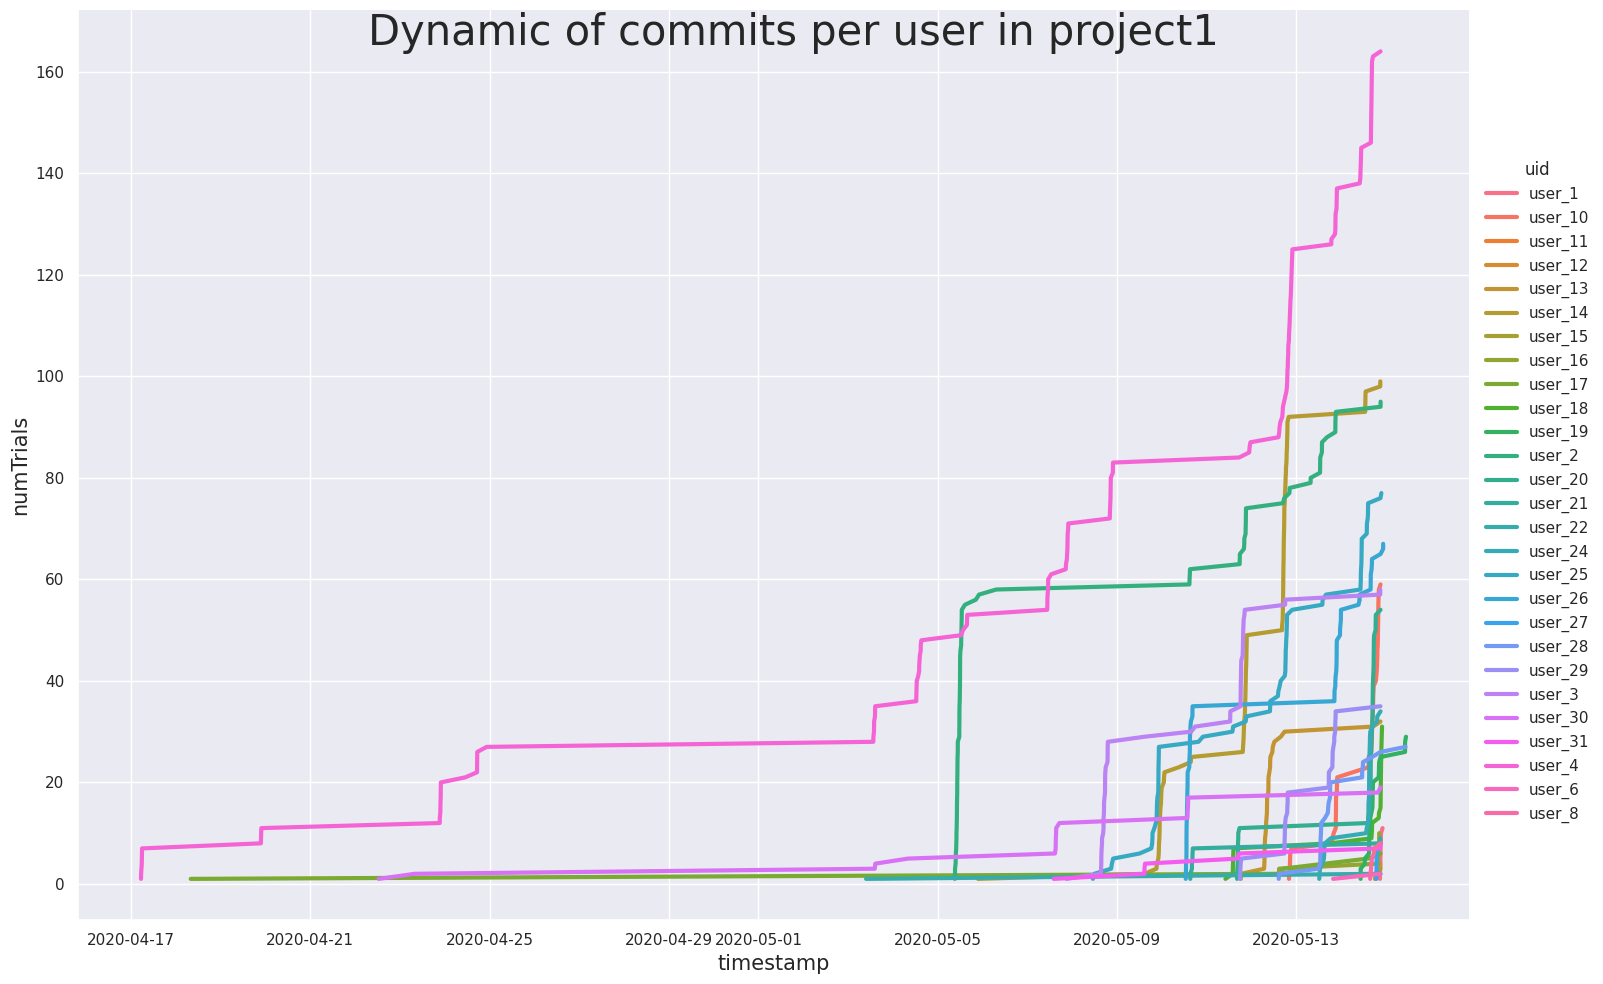

In [200]:
sns.set_theme(palette='dark',
              rc={'axes.labelsize': 15, 'lines.linewidth': 3})
sns.relplot(data=commits,
            x='timestamp',
            y='numTrials',
            legend='full',
            hue='uid',
            kind='line',
            height=10,
            aspect=1.5)
plt.suptitle('Dynamic of commits per user in project1', fontsize=30)

## Which user was the leader in the number of commits almost all of the time?

## The answer is __user_4__

---

## Which user was the leader for only a short period of time?

## The answer is __user_2__

In [201]:
con.close()